# Yaqoob David
## s914527

#News Reader

I have scrapped the headlines of the news related to technology and science from various magazine, newspapers and websites.

# The Motivation:

to collect dataset of the recent technology news from different resources, and the applying some NLP techniques in order to analyze to most common trend of technology.

For Machine Learning task we would do "Topic Modeling". Topic Modeling is an unsupervised learning approach to clustering documents, to discover topics based on their contents. It is very similar to how K-Means algorithm and Expectation-Maximization work. 

In [1]:
!pip install newspaper3k

     |████████████████████████████████| 215kB 8.1MB/s 
     |████████████████████████████████| 81kB 12.4MB/s 
     |████████████████████████████████| 7.4MB 49.5MB/s 
     |████████████████████████████████| 92kB 12.8MB/s 
  Created wheel for jieba3k: filename=jieba3k-0.35.1-cp37-none-any.whl size=7398404 sha256=5804377124238ff32125ebbd904215cdc748c219e1288bb1cc61ccba5e03b379
  Stored in directory: /root/.cache/pip/wheels/83/15/9c/a3f1f67e7f7181170ad37d32e503c35da20627c013f438ed34
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-cp37-none-any.whl size=13553 sha256=77cf3d55689b37f53d25769b57e663e8e673e844dc30942fef87e5c361419305
  Stored in directory: /root/.cache/pip/wheels/81/2b/43/a02ede72324dd40cdd7ca53aad718c7710628e91b8b0dc0f02
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-cp37-none-any.whl size=3358 sha256=6fe12c59b61ab1007d4f2701a5d4926a2cad8355cb8e09b300f89fb7335e99b8
  Stored in directory: /root/.cache/pip/wheels/de/03/ca/778e3a7a627e3d98836cc890e7cb40

In [1]:
import urllib 
from bs4 import BeautifulSoup   
import subprocess
import os
from time import sleep
import re
from datetime import date
import pandas as pd
import requests
from newspaper import Article

# Scrap the data:

the data was acquired from many websites such as: inshort, linux magazine, BBC technology, google news AI canada, yahoo tech and google news computing canada.

The data is scrapped as html file, parsed using BeautifulSoup, and then the relevant information is extracted and stored in csv file.
 
Depending on the accessibility of each website, sometimes the urllib is used and sometimes requests, i.e the request using urllib is forbidden in some website.

In [2]:
# data acquisition from inshort 
data_inshort = []
html_inshort = urllib.request.urlopen("https://inshorts.com/en/read/technology")  
soup_inshort = BeautifulSoup(html_inshort.read(),"html.parser") 
news_inshort = soup_inshort.find_all('div', attrs={'itemprop':'articleBody'}) 
for item in news_inshort:
    st=item.get_text()
    data_inshort.append({
        'text':st,
        'newspaper':'inshort',
        'country':'india',
        'date': str(date.today()),
        'auhtor':'unkown',

    })
#data_inshort 

In [3]:
df = pd.DataFrame(data_inshort)
df

,text,newspaper,country,date,auhtor
0,Prime Minister Narendra Modi will address the ...,inshort,india,2021-07-05,unkown
1,A complaint has been filed before Delhi Police...,inshort,india,2021-07-05,unkown
2,"Elon Musk, the world's second-richest man with...",inshort,india,2021-07-05,unkown
3,China has ordered app stores to remove ride-ha...,inshort,india,2021-07-05,unkown
4,The Swedish Coop grocery store chain closed al...,inshort,india,2021-07-05,unkown
5,Jeff Bezos will officially step down as the CE...,inshort,india,2021-07-05,unkown
6,A Delhi-based journalist Ritika Handoo is seek...,inshort,india,2021-07-05,unkown
7,Hackers suspected to be behind a mass ransomwa...,inshort,india,2021-07-05,unkown
8,An NFT of an original digital art made to comm...,inshort,india,2021-07-05,unkown
9,"The University of California, Berkeley, engine...",inshort,india,2021-07-05,unkown


In [4]:
# data acquisition from linux magazine
data_linux = []
html_linux = urllib.request.urlopen("https://www.linux-magazine.com/")  
soup_linux = BeautifulSoup(html_linux.read(),"html.parser") 
news_linux = soup_linux.find_all('p')
for p in news_linux:
    data_linux.append({
        'text':p.get_text().strip(),
        #'auhtor':'unkown',
        'newspaper':'linux',
        'country':'USA',
        'date': str(date.today()),
        'auhtor':'unkown',

    })
#data_linux

In [5]:
#df_linux
linux_df = pd.DataFrame(data_linux)
linux_df

,text,newspaper,country,date,auhtor
0,Editing text at the command line doesn't have ...,linux,USA,2021-07-05,unkown
1,The Lakka Linux distribution comes with everyt...,linux,USA,2021-07-05,unkown
2,Anki brings a virtual flash card box to the de...,linux,USA,2021-07-05,unkown
3,"With very little overhead, you can access stat...",linux,USA,2021-07-05,unkown
4,"Loki is a powerful, scalable, and easy-to-use ...",linux,USA,2021-07-05,unkown
5,Multimedia files are easy to convert – if you ...,linux,USA,2021-07-05,unkown
6,Automated web logins with command-line tools a...,linux,USA,2021-07-05,unkown
7,Chronicler Zack Brown reports on the latest ne...,linux,USA,2021-07-05,unkown
8,Void Linux offers a unique distribution with a...,linux,USA,2021-07-05,unkown
9,This month in Linux Voice.,linux,USA,2021-07-05,unkown


In [6]:
# google news AI canada
data_google_ai = []
html_google = requests.get('https://news.google.com/topics/CAAqJggKIiBDQkFTRWdvSUwyMHZNRGRqTVhZU0FtVnVHZ0pEUVNnQVAB/sections/CAQiR0NCQVNMd29JTDIwdk1EZGpNWFlTQldWdUxVZENHZ0pEUVNJTkNBUWFDUW9ITDIwdk1HMXJlaW9KRWdjdmJTOHdiV3Q2S0FBKi4IACoqCAoiJENCQVNGUW9JTDIwdk1EZGpNWFlTQldWdUxVZENHZ0pEUVNnQVABUAE?hl=en-CA&gl=CA&ceid=CA%3Aen')
news_google = BeautifulSoup(html_google.text,"html.parser").find_all('a', {'class':'VDXfz'})

for p in news_google[:]:
    try:
        headline_url = 'https://news.google.com'+p.get('href')[1:]
        article = Article(headline_url)
        article.download()
        article.parse()
        print(article.title.strip())
        print(str(article.publish_date.date()))
        print(str(article.title.strip()))
        
        try:
            d =str(article.publish_date.date())
        except:
            d=''
        try:
            auth = ' '.join(article.authors)
        except:
            auth=''
        data_google_ai.append({
            'text':str(article.title.strip()),
            #'auhtor':'unkown',
            'newspaper':'google_news',
            'country':'canada',
            'date': d,     
            'auhtor':auth,})
    except:
        pass
#data_google

AI Designs Quantum Physics Experiments Beyond What Any Human Has Conceived
Astronomers Use Artificial Intelligence to Reveal the Actual Shape of the Universe
2021-07-04
Astronomers Use Artificial Intelligence to Reveal the Actual Shape of the Universe
Robots were supposed to take our jobs. Instead, they’re making them worse.
2021-07-02
Robots were supposed to take our jobs. Instead, they’re making them worse.
TikTok's Algorithm and AI Tech Are Now up for Sale
TikTok parent ByteDance has begun selling the video app’s AI to other clients
2021-07-04
TikTok parent ByteDance has begun selling the video app’s AI to other clients
TikTok's AI is now available to other companies
Subscribe to read
TikTok is now selling its AI to other companies including in India
Observation, simulation, and AI join forces to reveal a clear universe
'Edge of chaos' opens pathway to artificial intelligence discoveries
SoftBank suspends production of chatty robot Pepper
2021-06-29
SoftBank suspends production of c

In [7]:
google_ai_df = pd.DataFrame(data_google_ai)
google_ai_df

,text,newspaper,country,date,auhtor
0,Astronomers Use Artificial Intelligence to Rev...,google_news,canada,2021-07-04,Mike O'Neill National Institutes Of Natural Sc...
1,Robots were supposed to take our jobs. Instead...,google_news,canada,2021-07-02,Emily Stewart Nicole Narea Alissa Wilkinson Za...
2,TikTok parent ByteDance has begun selling the ...,google_news,canada,2021-07-04,Kim Lyons Jul
3,SoftBank suspends production of chatty robot P...,google_news,canada,2021-06-29,Sven Asai Thomas Goodtime Robert Cikki Michael...
4,"The future of deep learning, according to its ...",google_news,canada,2021-07-01,Ben Dickson Ben Is A Software Engineer The Fou...
5,McDonald's is replacing human drive-thru atten...,google_news,canada,2021-07-04,Teresa Carey Scotty Hendricks Paul Ratner Geof...
6,Tesla AI chief explains why self-driving cars ...,google_news,canada,2021-07-03,Ben Dickson
7,Google AI Introduces A Machine Learning Based ...,google_news,canada,2021-07-03,Shilpi Is A Contributor To Marktechpost.Com. S...
8,Microsoft and OpenAI have a new A.I. tool that...,google_news,canada,2021-06-29,Jordan Novet
9,So you want to conquer the Earth? 5 science ti...,google_news,canada,2021-06-29,Tristan Greene Story By


In [8]:
## bbc news tech 
data_bbc = []
html_tech = requests.get("https://www.bbc.com/news/technology") 
soup_tech = BeautifulSoup(html_tech.text, 'html.parser') 
news_tech = soup_tech.find_all('p', { 'class': 'gs-c-promo-summary' })
for p in news_tech:
    data_bbc.append({
        'text':p.get_text().strip(),
        #'auhtor':'unkown',
        'newspaper':'bbc_tech',
        'country':'Uk',
        'date': str(date.today()),
        'auhtor':'unkown',

    })

In [9]:
bbc_news_tech_df = pd.DataFrame(data_bbc)
bbc_news_tech_df

,text,newspaper,country,date,auhtor
0,"As Bezos leaves his role as CEO, those who hav...",bbc_tech,Uk,2021-07-05,unkown
1,"As Bezos leaves his role as CEO, those who hav...",bbc_tech,Uk,2021-07-05,unkown
2,The ride-hailing company is facing regulatory ...,bbc_tech,Uk,2021-07-05,unkown
3,Some 500 stores are forced to close due to the...,bbc_tech,Uk,2021-07-05,unkown
4,Four big Chinese firms have signed up to spons...,bbc_tech,Uk,2021-07-05,unkown
5,The officer in Oakland wanted to prevent activ...,bbc_tech,Uk,2021-07-05,unkown
6,The new colour in the Windows 11 operating sys...,bbc_tech,Uk,2021-07-05,unkown
7,Production of the Pepper robot has been suspen...,bbc_tech,Uk,2021-07-05,unkown
8,"As Bezos leaves his role as CEO, those who hav...",bbc_tech,Uk,2021-07-05,unkown
9,The ride-hailing company is facing regulatory ...,bbc_tech,Uk,2021-07-05,unkown


In [10]:
# yahoo tech - credential information is used
data_yahoo = []
login_url = 'https://login.yahoo.com/?.intl=in&src=noSrc&intl=en&specId=yidReg&done=https%3A%2F%2Fwww.yahoo.com&nr=1'
credential_data = {
    'username': 'username',
    'password': 'password'
}


s = requests.Session()
response = requests.post(login_url , credential_data)
html_yahoo= s.get('https://uk.finance.yahoo.com/')
news_yahoo = BeautifulSoup(html_yahoo.text, 'html.parser').find_all('p')
for p in news_yahoo[:]:
    data_yahoo.append({
        'text':p.get_text().strip(),
        #'auhtor':'unkown',
        'newspaper':'yahoo',
        'country':'UK',
        'date': str(date.today()),
        'auhtor':'unkown'

    })
#data_yahoo

In [11]:
yahoo_df = pd.DataFrame(data_yahoo)
yahoo_df

,text,newspaper,country,date,auhtor
0,We are experiencing some temporary issues. The...,yahoo,UK,2021-07-05,unkown
1,A guide to taking the first step on the proper...,yahoo,UK,2021-07-05,unkown
2,The all cash offer is subject to shareholder a...,yahoo,UK,2021-07-05,unkown
3,Can my partner and I buy two properties using ...,yahoo,UK,2021-07-05,unkown
4,KitchenAid’s poor customer service has got tro...,yahoo,UK,2021-07-05,unkown
5,Venu 2 review: can Garmin make a good smartwat...,yahoo,UK,2021-07-05,unkown
6,Housebuilder Taylor Wimpey opposed plans to cu...,yahoo,UK,2021-07-05,unkown
7,The Government is also being urged to change t...,yahoo,UK,2021-07-05,unkown
8,Bitcoin falls 2%,yahoo,UK,2021-07-05,unkown
9,China announced on Monday probes into two more...,yahoo,UK,2021-07-05,unkown


In [12]:
# google news computing canada
data_google_latest = []
html_google = requests.get('https://news.google.com/topics/CAAqJggKIiBDQkFTRWdvSUwyMHZNRGRqTVhZU0FtVnVHZ0pEUVNnQVAB?hl=en-CA&gl=CA&ceid=CA%3Aen')

news_google = BeautifulSoup(html_google.text,"html.parser").find_all('a', {'class':'VDXfz'})

for p in news_google[:]:
    try:
        headline_url = 'https://news.google.com'+p.get('href')[1:]
        article = Article(headline_url)
        article.download()
        article.parse()
        print(article.title.strip())
        print(str(article.publish_date.date()))
        print(str(article.title.strip()))
        
        try:
            d =str(article.publish_date.date())
        except:
            d=''
        try:
            auth = ' '.join(article.authors)
        except:
            auth=''
        data_google_latest.append({
            'text':str(article.title.strip()),
            #'auhtor':'unkown',
            'newspaper':'google_news',
            'country':'canada',
            'date': d,     
            'auhtor':auth,})
    except:
        pass
#data_google

Xiaomi’s Mi 11 Ultra is getting an ultra-limited release in India
2021-07-05
Xiaomi’s Mi 11 Ultra is getting an ultra-limited release in India
A famous leaker shows what might have been with discarded Xiaomi Mi 11-series designs
Xiaomi Mi MIX 4 with under-screen camera & Snapdragon 888 Plus price leaks
2021-07-03
Xiaomi Mi MIX 4 with under-screen camera & Snapdragon 888 Plus price leaks
Google removes popular Android apps that stole Facebook passwords
Uninstall These Malicious Android Apps That Stole Facebook Passwords
Google rolling out Play Store redesign with Wear OS 3.0 UI
2021-07-04
Google rolling out Play Store redesign with Wear OS 3.0 UI
Google Kicks Credential-Stealing Android Apps From the Play Store
Apex Legends Servers Hacked to Protest Titanfall Hacks, Respawn Says It Has Fixed the Problem
Apex Legends Hackers Fill Game With Messages Complaining About Titanfall Hackers
Apex Legends hackers interrupt games with messages about Titanfall hacking
2021-07-04
Apex Legends hacker

In [13]:
computing_canada = pd.DataFrame(data_google_latest)
computing_canada 

,text,newspaper,country,date,auhtor
0,Xiaomi’s Mi 11 Ultra is getting an ultra-limit...,google_news,canada,2021-07-05,Sam Byford Jul
1,Xiaomi Mi MIX 4 with under-screen camera & Sna...,google_news,canada,2021-07-03,Vinay Patel Argam Artashyan Ying Hua Efe Udin ...
2,Google rolling out Play Store redesign with We...,google_news,canada,2021-07-04,
3,Apex Legends hackers interrupt games with mess...,google_news,canada,2021-07-04,Richard Lawler Jul
4,Apex attack ‘has not put players’ personal inf...,google_news,canada,2021-07-05,Pedro Peres
...,...,...,...,...,...
107,PUBG Mobile Battlegrounds Mobile India IOS Rel...,google_news,canada,2021-07-05,Vivek Singh
108,"Windows 11: Control Panel is here to stay, but...",google_news,canada,2021-07-04,
109,Feature: thatgamecompany On Sky: Children Of T...,google_news,canada,2021-07-04,Nintendo Life Thomas Whitehead
110,Supercharged Lamborghini Huracan Drag Races Po...,google_news,canada,2021-07-04,Dragos Chitulescu


In [14]:
#Merging all Scrapped data into one dataset.
data = pd.concat([df,pd.DataFrame(linux_df),pd.DataFrame(google_ai_df),pd.DataFrame(yahoo_df),pd.DataFrame(bbc_news_tech_df),pd.DataFrame(computing_canada)], ignore_index=True)

In [15]:
# correcting name of author column
data.rename(columns={'auhtor':'author'}, inplace=True)
data.head()

,text,newspaper,country,date,author
0,Prime Minister Narendra Modi will address the ...,inshort,india,2021-07-05,unkown
1,A complaint has been filed before Delhi Police...,inshort,india,2021-07-05,unkown
2,"Elon Musk, the world's second-richest man with...",inshort,india,2021-07-05,unkown
3,China has ordered app stores to remove ride-ha...,inshort,india,2021-07-05,unkown
4,The Swedish Coop grocery store chain closed al...,inshort,india,2021-07-05,unkown


In [16]:
data.tail()

,text,newspaper,country,date,author
224,PUBG Mobile Battlegrounds Mobile India IOS Rel...,google_news,canada,2021-07-05,Vivek Singh
225,"Windows 11: Control Panel is here to stay, but...",google_news,canada,2021-07-04,
226,Feature: thatgamecompany On Sky: Children Of T...,google_news,canada,2021-07-04,Nintendo Life Thomas Whitehead
227,Supercharged Lamborghini Huracan Drag Races Po...,google_news,canada,2021-07-04,Dragos Chitulescu
228,Ferrari F12berlinetta Drag Races Porsche 911 T...,google_news,canada,2021-07-04,Ciprian Florea


In [17]:
# Importing required libraries
import re
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import string
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [18]:
# check missing values
data.isna().sum()

text         0
newspaper    0
country      0
date         0
author       0
dtype: int64

In [19]:
data.describe()

,text,newspaper,country,date,author
count,229,229,229,229,229
unique,218,5,5,8,100
top,"As Bezos leaves his role as CEO, those who hav...",google_news,canada,2021-07-05,unkown
freq,3,157,157,88,72


In [20]:
#import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# NLP Processing

In [21]:
# making a copy of dataset
df = data.copy()

In [22]:
# the punctuation and the digit are removed
def remove_punctuation(text):
    '''a function for removing punctuation'''
    
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)


# remove digits and '’'
df['text'] = df['text'].str.replace('\d+', '')
df['text'] = df['text'].str.replace('’', '')

df['text'] = df['text'].apply(remove_punctuation)
df.head(10)

,text,newspaper,country,date,author
0,Prime Minister Narendra Modi will address the ...,inshort,india,2021-07-05,unkown
1,A complaint has been filed before Delhi Police...,inshort,india,2021-07-05,unkown
2,Elon Musk the worlds secondrichest man with a ...,inshort,india,2021-07-05,unkown
3,China has ordered app stores to remove ridehai...,inshort,india,2021-07-05,unkown
4,The Swedish Coop grocery store chain closed al...,inshort,india,2021-07-05,unkown
5,Jeff Bezos will officially step down as the CE...,inshort,india,2021-07-05,unkown
6,A Delhibased journalist Ritika Handoo is seeki...,inshort,india,2021-07-05,unkown
7,Hackers suspected to be behind a mass ransomwa...,inshort,india,2021-07-05,unkown
8,An NFT of an original digital art made to comm...,inshort,india,2021-07-05,unkown
9,The University of California Berkeley engineer...,inshort,india,2021-07-05,unkown


In [23]:
df.tail(10)

,text,newspaper,country,date,author
219,Doom Eternal Horde Mode Announced Battlemode G...,google_news,canada,2021-07-02,Michael Ruiz
220,Battlegrounds Mobile India Surpasses Million ...,google_news,canada,2021-07-05,
221,Battlegrounds Mobile India the new PUBG Mobile...,google_news,canada,2021-07-04,
222,Battlegrounds Mobile India ranks no in Google ...,google_news,canada,2021-07-04,
223,How to download Battlegrounds Mobile India BGM...,google_news,canada,2021-07-05,Francis Banerjee
224,PUBG Mobile Battlegrounds Mobile India IOS Rel...,google_news,canada,2021-07-05,Vivek Singh
225,Windows Control Panel is here to stay but its...,google_news,canada,2021-07-04,
226,Feature thatgamecompany On Sky Children Of The...,google_news,canada,2021-07-04,Nintendo Life Thomas Whitehead
227,Supercharged Lamborghini Huracan Drag Races Po...,google_news,canada,2021-07-04,Dragos Chitulescu
228,Ferrari Fberlinetta Drag Races Porsche Turbo ...,google_news,canada,2021-07-04,Ciprian Florea


## Dealing with stop words

In [24]:
# extracting the stop words from nltk library
swe = stopwords.words('english')
# displaying the stopwords
print(np.array(swe))
print(len(np.array(swe)))

['i' 'me' 'my' 'myself' 'we' 'our' 'ours' 'ourselves' 'you' "you're"
 "you've" "you'll" "you'd" 'your' 'yours' 'yourself' 'yourselves' 'he'
 'him' 'his' 'himself' 'she' "she's" 'her' 'hers' 'herself' 'it' "it's"
 'its' 'itself' 'they' 'them' 'their' 'theirs' 'themselves' 'what' 'which'
 'who' 'whom' 'this' 'that' "that'll" 'these' 'those' 'am' 'is' 'are'
 'was' 'were' 'be' 'been' 'being' 'have' 'has' 'had' 'having' 'do' 'does'
 'did' 'doing' 'a' 'an' 'the' 'and' 'but' 'if' 'or' 'because' 'as' 'until'
 'while' 'of' 'at' 'by' 'for' 'with' 'about' 'against' 'between' 'into'
 'through' 'during' 'before' 'after' 'above' 'below' 'to' 'from' 'up'
 'down' 'in' 'out' 'on' 'off' 'over' 'under' 'again' 'further' 'then'
 'once' 'here' 'there' 'when' 'where' 'why' 'how' 'all' 'any' 'both'
 'each' 'few' 'more' 'most' 'other' 'some' 'such' 'no' 'nor' 'not' 'only'
 'own' 'same' 'so' 'than' 'too' 'very' 's' 't' 'can' 'will' 'just' 'don'
 "don't" 'should' "should've" 'now' 'd' 'll' 'm' 'o' 're' 've' 'y'

In [25]:
# function to remove stopwords
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in swe]
    # joining the list of words with space separator
    return " ".join(text)

df['text'] = df['text'].apply(stopwords)
df.head()

,text,newspaper,country,date,author
0,prime minister narendra modi address cowin glo...,inshort,india,2021-07-05,unkown
1,complaint filed delhi police cyber cell twitte...,inshort,india,2021-07-05,unkown
2,elon musk worlds secondrichest man billion for...,inshort,india,2021-07-05,unkown
3,china ordered app stores remove ridehailing ap...,inshort,india,2021-07-05,unkown
4,swedish coop grocery store chain closed stores...,inshort,india,2021-07-05,unkown


In [26]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

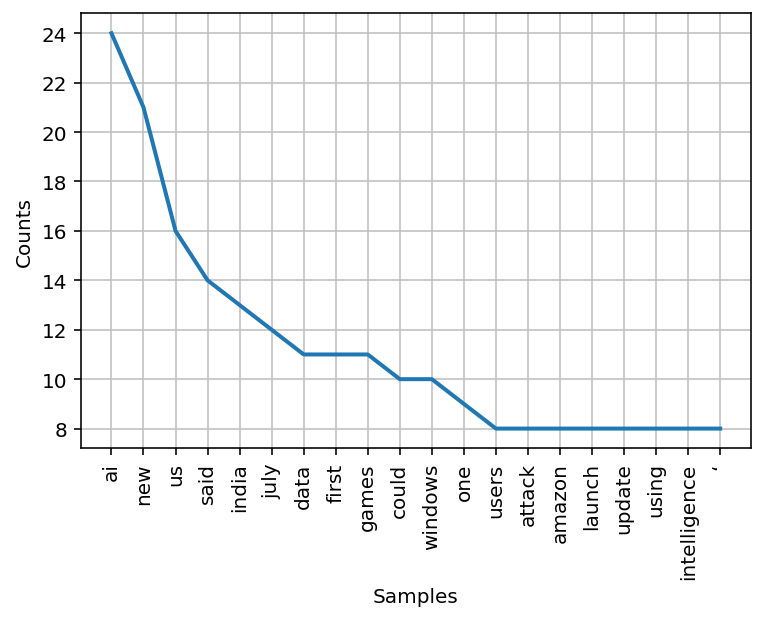

1570
<FreqDist with 1570 samples and 2661 outcomes>


In [27]:
# finding the words with the highest frequency (in general)
words = nltk.tokenize.word_tokenize(' '.join(df['text']))

count = set(words)
dic = nltk.FreqDist(words)
nltk.FreqDist(words).plot(20, cumulative=False)

# frequency of all words 
print(len(count))
print(dic)

# Getting a set of technological keywords:
this is the first set of keywords which will be used later, it is scrapped from the Guardian website

In [28]:
html_guard = requests.get('https://www.theguardian.com/technology/list/alltechnologykeywords#keyword7') 
soup_kw = BeautifulSoup(html_guard.text,"html.parser").find_all('a')

In [29]:
for i,p in enumerate(soup_kw[82:511]+soup_kw[537:547]):
    print(str(i)+ ' '+ str(p.get_text().strip()))

0 Aaron Swartz
1 Acer
2 Acta
3 Activate conference
4 Activision Blizzard
5 Michael Acton Smith
6 Adobe
7 Airbnb
8 Keri Allan
9 Alternate reality games
10 Amazon.com
11 Android
12 Angry Birds
13 Anonymous
14 AOL
15 Apple
16 Apple Watch
17 Apps
18 Apps of the month
19 Apps Pitch
20 Apps rush
21 Arcade games
22 Arpanet
23 Artificial intelligence (AI)
24 Ashley Madison
25 Assassin's Creed
26 Asus
27 Audioboo
28 Augmented reality
29 Gaming awards
30 Steve Ballmer
31 Carol Bartz
32 Battlefield
33 Bebo
34 Tim Berners-Lee
35 Best Android apps
36 Best games for Christmas 2012
37 Best iPhone and iPad apps
38 Jeff Bezos
39 Big data
40 Bing
41 Biometrics
42 Bitcoin
43 BitTorrent
44 BlackBerry
45 BlackBerry corporation
46 Blogging
47 Blu-ray
48 Britain's broadband vision
49 Broadband
50 Call of Duty
51 Rio Caraeff
52 Paul Carr
53 Casual gaming
54 CES 2011
55 CES 2012
56 CES 2013
57 CES 2014
58 CES 2015
59 CES 2016
60 The Charles Arthur column
61 Charlie's Angles
62 Chatroulette
63 Chatterbox
64 Chi

In [30]:
tech_keywords = ['keyword']
for p in soup_kw[82:511]+soup_kw[537:547]:
    tech_keywords.append(p.get_text().strip())

In [31]:
df_keywords=pd.DataFrame(tech_keywords)
df_keywords.rename(columns={'':'keywords'},inplace=True)
df_keywords.head(20)

,0
0,keyword
1,Aaron Swartz
2,Acer
3,Acta
4,Activate conference
5,Activision Blizzard
6,Michael Acton Smith
7,Adobe
8,Airbnb
9,Keri Allan


In [32]:
# storing extracted keywords in csv file
df_keywords.to_csv('keywords.csv',mode ='a', header=False, index=False)

In [33]:
## the stored csv file
df_kw = pd.read_csv('keywords.csv')
df_kw

,keyword
0,Aaron Swartz
1,Acer
2,Acta
3,Activate conference
4,Activision Blizzard
...,...
434,License/buy our content
435,Privacy policy
436,Terms & conditions
437,Advertising guide


In [34]:
# reading the keywords from csv file (from the guardian)
keywords = pd.read_csv('keywords.csv')
kw1= list(keywords['keyword'].str.lower())
keywords.head()

,keyword
0,Aaron Swartz
1,Acer
2,Acta
3,Activate conference
4,Activision Blizzard


In [35]:
# another group of keywords obtained from the job description in indeed plateform (related to data science and AI)
# and some keywords are added manually
kw2 =['python', 'pytorch', 'sql', 'mxnet', 'mlflow', 'einstein', 'theano', 'pyspark', 'solr', 'mahout', 'cassandra',
      'aws', 'powerpoint', 'spark', 'pig', 'sas', 'java', 'nosql', 'docker', 'salesforce', 'scala','c++',
      'net', 'tableau', 'pandas', 'scikitlearn', 'sklearn', 'matlab', 'scala', 'keras', 'tensorflow', 'clojure',
 'caffe', 'scipy', 'numpy', 'matplotlib', 'vba', 'spss', 'linux', 'azure', 'cloud', 'gcp', 'mongodb', 'mysql', 'oracle',
'redshift', 'snowflake', 'kafka', 'javascript', 'qlik', 'jupyter', 'perl', 'bigquery', 'unix', 'react', 'scikit', 'powerbi',
      's3', 'ec2', 'lambda', 'ssrs', 'kubernetes', 'hana', 'spacy', 'tf', 'django', 'sagemaker','seaborn', 'mllib', 'github', 'git', 'elasticsearch', 'splunk', 'airflow', 'looker', 'rapidminer', 'birt', 'pentaho', 
 'jquery', 'nodejs', 'd3', 'plotly', 'bokeh', 'xgboost', 'rstudio', 'shiny', 'dash', 'h20', 'h2o', 'hadoop', 'mapreduce', 
 'hive', 'cognos', 'angular', 'nltk', 'flask', 'node', 'firebase', 'bigtable', 'rust', 'php', 'cntk', 'lightgbm','kubeflow',
      'rpython', 'unixlinux', 'postgressql', 'postgresql', 'postgres', 'hbase', 'dask', 'ruby', 'julia', 'tensor',
 'dplyr','ggplot2','esquisse','bioconductor','shiny','lubridate','knitr','mlr','quanteda','dt','rcrawler','caret',
'rmarkdown','leaflet','janitor','ggvis','plotly','rcharts','rbokeh','broom','stringr','magrittr','slidify','rvest',
'rmysql','rsqlite','prophet','glmnet','text2vec','snowballc','quantmod','rstan','swirl','datasciencer','amazon web services',
      'google cloud', 'sql server','NVIDIA ','Quantum','finance','coronavirus','Azure','Edge','Intelligence',
      'statistics', 'cleansing', 'chatbot', 'cleaning', 'blockchain', 'causality', 'correlation', 'bandit', 'anomaly',
      'kpi', 'dashboard', 'geospatial', 'ocr', 'econometrics', 'pca', 'gis', 'svm', 'svd', 'tuning', 'hyperparameter', 
      'hypothesis','salesforcecom', 'segmentation', 'biostatistics', 'unsupervised', 'supervised', 'exploratory',
      'recommender','recommendations', 'research', 'sequencing', 'probability', 'reinforcement', 'graph', 'bioinformatics',
 'chi', 'knn', 'outlier', 'etl', 'normalization', 'classification', 'optimizing', 'prediction', 'forecasting', 
      'clustering', 'cluster', 'optimization', 'visualization', 'nlp', 'regression', 'logistic', 'nn',
      'cnn', 'glm', 'rnn', 'lstm', 'gbm', 'boosting', 'recurrent', 'convolutional', 'bayesian','Elon Musk'
 'bayes', 'random forest', 'natural language processing', 'machine learning', 'decision tree', 'deep learning',
      'experimental design', 'satellite','Android',
 'time series', 'nearest neighbors', 'neural network', 'support vector machine', 'computer vision', 'machine vision',
      'dimensionality reduction', 'Zoom','Apple','Samsung'
 'text analytics', 'power bi',  'testing', 'chat bot', 'data mining']
kw2 = (' '.join(kw2).lower()).split(' ')

In [36]:

# add a column containing only the tech words (existing in kw_list)
def tech_text(text):
    tech_text = ' '.join([word.strip() for word in nltk.tokenize.word_tokenize(text) if word.strip() in  kw1 +kw2])
    return(tech_text)

df['tech_text'] =df['text'].apply(tech_text)
df[10:20]

,text,newspaper,country,date,author,tech_text
10,facebook said resolved technical issue caused ...,inshort,india,2021-07-05,unkown,facebook facebook instagram services
11,tesla ceo elon musk revealed automakers cybert...,inshort,india,2021-07-05,unkown,elon design
12,amazon accused exploiting consumers vulnerable...,inshort,india,2021-07-05,unkown,amazon amazon amazon
13,antivirus software creator john mcafee authori...,inshort,india,2021-07-05,unkown,software
14,skybridge capital founder anthony scaramucci p...,inshort,india,2021-07-05,unkown,bitcoin
15,indian actor vishal malhotra sold nft showcasi...,inshort,india,2021-07-05,unkown,
16,instagram working feature called exclusive sto...,inshort,india,2021-07-05,unkown,instagram instagram
17,porsche recalling units electric taycan cars f...,inshort,india,2021-07-05,unkown,software software
18,telecom watchdog urged government reject vodaf...,inshort,india,2021-07-05,unkown,time
19,hyundai motor europes ceo michael cole recent ...,inshort,india,2021-07-05,unkown,


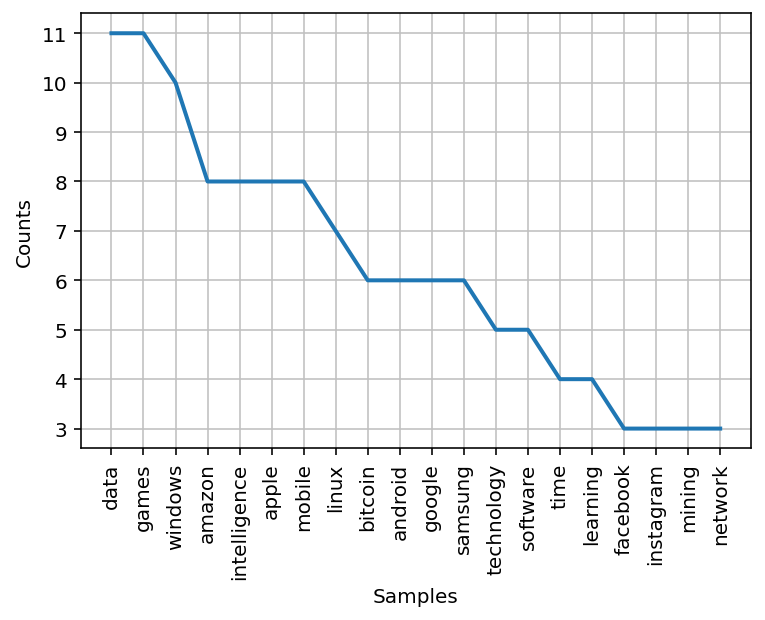

58


FreqDist({'adobe': 1,
          'amazon': 8,
          'android': 6,
          'apple': 8,
          'apps': 2,
          'bitcoin': 6,
          'cloud': 1,
          'computer': 1,
          'cybercrime': 1,
          'data': 11,
          'deep': 2,
          'design': 1,
          'edge': 1,
          'elon': 2,
          'energy': 2,
          'facebook': 3,
          'games': 11,
          'google': 6,
          'hacking': 1,
          'instagram': 3,
          'intel': 3,
          'intelligence': 8,
          'ios': 2,
          'ipad': 2,
          'iphone': 2,
          'laptops': 1,
          'learning': 4,
          'linux': 7,
          'machine': 2,
          'microsoft': 2,
          'mining': 3,
          'mobile': 8,
          'net': 1,
          'network': 3,
          'neural': 1,
          'nokia': 3,
          'nvidia': 1,
          'pc': 1,
          'php': 1,
          'playstation': 1,
          'research': 1,
          'robots': 2,
          'samsung': 6,
     

In [37]:
# finding the tech words with the highest frequency 
words_tech = nltk.tokenize.word_tokenize(' '.join(df['tech_text']))

count_tech = set(words_tech)
dic_tech = nltk.FreqDist(words_tech)
nltk.FreqDist(words_tech).plot(20, cumulative=False)

# frequency of all words 
print(len(count_tech))
dic_tech

# Topic Modeling with LDA and NMF

Topic Modeling is an unsupervised learning approach to clustering documents, to discover topics based on their contents.

## LDA

LDA, or Latent Derelicht Analysis is a probabilistic model, and to obtain cluster assignments, it uses two probability values: P( word | topics) and P( topics | documents). These values are calculated based on an initial random assignment, after which they are repeated for each word in each document, to decide their topic assignment. In an iterative procedure, these probabilities are calculated multiple times, until the convergence of the algorithm

## NMF

Non-negative Matrix Factorization is a Linear-algeabreic model, that factors high-dimensional vectors into a low-dimensionality representation. Similar to Principal component analysis (PCA), NMF takes advantage of the fact that the vectors are non-negative. By factoring them into the lower-dimensional form, NMF forces the coefficients to also be non-negative

## Code

Lets! implement these two algorithms. We will apply topic modeling on the above scrapped data of tech news headlines.

In [38]:
import pandas as pd;
import numpy as np;
import scipy as sp;
import sklearn;
import sys;
from nltk.corpus import stopwords;
import nltk;
from gensim.models import ldamodel
import gensim.corpora;
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer;
from sklearn.decomposition import NMF;
from sklearn.preprocessing import normalize;
import pickle;

In [39]:
df_2 = data.copy()

In [40]:
df_2.head()

,text,newspaper,country,date,author
0,Prime Minister Narendra Modi will address the ...,inshort,india,2021-07-05,unkown
1,A complaint has been filed before Delhi Police...,inshort,india,2021-07-05,unkown
2,"Elon Musk, the world's second-richest man with...",inshort,india,2021-07-05,unkown
3,China has ordered app stores to remove ride-ha...,inshort,india,2021-07-05,unkown
4,The Swedish Coop grocery store chain closed al...,inshort,india,2021-07-05,unkown


In [41]:
df_2.shape

(229, 5)

In [42]:
df_2.text.unique().shape

(218,)

In [43]:
# 10 most repeated Head lines
df_2.groupby(['text']).size().reset_index(name='counts')\
  .sort_values('counts', ascending=False).head(10)

,text,counts
26,"As Bezos leaves his role as CEO, those who hav...",3
78,Four big Chinese firms have signed up to spons...,3
157,Some 500 stores are forced to close due to the...,3
180,The ride-hailing company is facing regulatory ...,3
177,The new colour in the Windows 11 operating sys...,2
134,Production of the Pepper robot has been suspen...,2
178,The officer in Oakland wanted to prevent activ...,2
0,,1
141,Researcher finds another network name that can...,1
142,Researcher finds certain network names can dis...,1


In [44]:
# We only need the Headlines text column from the data
data_text = df_2[['text']];

In [45]:
data_text = data_text.astype('str');
for idx in range(len(data_text)):
    
    #go through each word in each data_text row, remove stopwords, and set them on the index.
    data_text.iloc[idx]['text'] = [word for word in data_text.iloc[idx]['text'].split(' ') if word not in stopwords.words()];
    
    #print logs to monitor output
    if idx % 1000 == 0:
        sys.stdout.write('\rc = ' + str(idx) + ' / ' + str(len(data_text)));
#save data because it takes very long to remove stop words
pickle.dump(data_text, open('data_text.dat', 'wb'))
#get the words as an array for lda input
train_headlines = [value[0] for value in data_text.iloc[0:].values];

c = 0 / 229

In [46]:
num_topics = 10;

In [47]:
id2word = gensim.corpora.Dictionary(train_headlines);
corpus = [id2word.doc2bow(text) for text in train_headlines];
lda = ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics);

### Generating LDA topics:


In [48]:
def get_lda_topics(model, num_topics):
    word_dict = {};
    for i in range(num_topics):
        words = model.show_topic(i, topn = 20);
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words];
    return pd.DataFrame(word_dict);

In [49]:
get_lda_topics(lda, num_topics)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07,Topic # 08,Topic # 09,Topic # 10
0,The,New,buy,new,The,The,AI,The,The,new
1,2,The,AI,The,said,camera,Chinese,robot,July,OnePlus
2,India,EA,attack,Mobile,Bitcoin,And,Is,AI,Anki,plans
3,personal,4,stores,update,mining,On,India,Is,convert,A.I.
4,Plus,India,close,Amazon,Lummis,Top,DiDi,Ethereum,useful,replacement
5,camera,days,500,Taycan,issue,could,US,How,tools.,AI
6,2021:,"home,",due,prices,resolved,11,Google,Samsung,another,give
7,4,problems,US.,Windows,new,Windows,Galaxy,Will,WD,Play
8,Snapdragon,facing,cyber,11,Drag,phone,"3,",Features,Vishal,Eternal
9,Mi,company,using,logon,Android,Against,Z,Pepper,actor,merge


### Implementing NMF


For NMF, we need to obtain a design matrix. To improve results, I am going to apply TfIdf transformation to the counts.

In [50]:
#the count vectorizer module needs string inputs, not array, so I join them with a space. This is a very quick operation.
train_headlines_sentences = [' '.join(text) for text in train_headlines]

Now, we obtain a Counts design matrix, for which we use SKLearn’s CountVectorizer module. The transformation will return a matrix of size (Documents x Features), where the value of a cell is going to be the number of times the feature (word) appears in that document.

To reduce the size of the matrix, to speed up computation, we will set the maximum feature size to 5000, which will take the top 5000 best features that can contribute to our model.


In [51]:
vectorizer = CountVectorizer(analyzer='word', max_features=5000);
x_counts = vectorizer.fit_transform(train_headlines_sentences);

Next, we set a TfIdf Transformer, and transform the counts with the model.

In [52]:
transformer = TfidfTransformer(smooth_idf=False);
x_tfidf = transformer.fit_transform(x_counts);

And now we normalize the TfIdf values to unit length for each row.

In [53]:
xtfidf_norm = normalize(x_tfidf, norm='l1', axis=1)

And finally, obtain a NMF model, and fit it with the sentences.

In [54]:
#obtain a NMF model.
model = NMF(n_components=num_topics, init='nndsvd');
#fit the model
model.fit(xtfidf_norm)

NMF(alpha=0.0, beta_loss='frobenius', init='nndsvd', l1_ratio=0.0, max_iter=200,
    n_components=10, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

### Generating NMF topics:


We are going to iterate over each topic, obtain the most important scoring words in each cluster, and add them to a Dataframe, as before.

In [55]:
def get_nmf_topics(model, n_top_words):
    
    #the word ids obtained need to be reverse-mapped to the words so we can print the topic names.
    feat_names = vectorizer.get_feature_names()
    
    word_dict = {};
    for i in range(num_topics):
        
        #for each topic, obtain the largest values, and add the words they map to into the dictionary.
        words_ids = model.components_[i].argsort()[:-20 - 1:-1]
        words = [feat_names[key] for key in words_ids]
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = words;
    
    return pd.DataFrame(word_dict);

Call the function and obtain the topics:

In [56]:
get_nmf_topics(model,20)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07,Topic # 08,Topic # 09,Topic # 10
0,falls,intelligence,linux,find,leaves,big,ai,11,robot,oneplus
1,bitcoin,artificial,jobs,bias,role,sponsor,how,new,pepper,coloros
2,lummis,google,uk,using,ponder,signed,video,windows,production,oxygenos
3,mining,potential,voice,analysis,lessons,football,revolutionising,camera,human,oppo
4,wyoming,decentralized,month,sentiment,learned,firms,industry,samsung,raising,merge
5,miners,makes,this,bert,as,tournament,enough,galaxy,suspended,series
6,if,responsible,supposed,guide,bezos,four,won,smartphone,questions,nord
7,interview,exhortation,worse,to,worked,european,is,vivo,bots,firstpost
8,cynthia,future,are,against,ceo,year,future,launch,like,more
9,invited,10,robots,security,apple,chinese,data,first,softbank,technology


### Conclusion 

The two tables above, in each section, show the results from LDA and NMF on both datasets. There is some coherence between the words in each clustering. For example, Topic # 01 in LDA shows words associated with production and platform, as evident with words such as “Intel”, “chip”, “windows”, “Nintendo, and “website”. Other topics show different patterns.

On the other hand, comparing the results of LDA to NMF also shows that NMF performs better. Looking at Topic # 03, we can see there are many Tech devices clustered into the same category, along with the word “patent”. This type of headline is very common in news articles, with wording similar to “galaxy Smartphone with camera” or “vivo”.

We also see two topics related to violence. First, Topic # 04 focuses on bias related terms, such as “find”, “bert”, “sentiment”, “against”, and “privacy”. Second, Topic # 07 focuses on terms, such as “Intelligence”, “responsible”, “lawsuit”, and “voice”. This is an interesting split between the topics because although the terms in each are very closely related, one focuses more on biases, and the other more on Artificial Intelligence. the results show that NMF performs much better than LDA.
